According to the reading which I did, MoA (Mechanism of Affect) describes the process by which a molecule, such as a drug, functions to produce a pharmacological effect.

We have given info such as:

* Gene Expression Data (g-)
* Cell Viability Data (c-)
* Cp Type 
* cp_vehicle - indicates samples treated with a compound
* ctrl_vehicle - with a control perturbation 
* control perturbations have no MoAs  --- Important to look at.   
* Duration and Dose of the Treatment
* MoA labels for prediction

In [2]:
!pip install iterative-stratification

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [4]:
train_path = '/kaggle/input/lish-moa/train_features.csv'
df_train_features = pd.read_csv(train_path)
test_path = '/kaggle/input/lish-moa/test_features.csv'
df_test_features = pd.read_csv(test_path)
train_targets_path = '/kaggle/input/lish-moa/train_targets_scored.csv'
df_train_target = pd.read_csv(train_targets_path)

In [5]:
df_train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
print("Total Records for train : ",df_train_features.sig_id.nunique())
print("Total Features for train : ", df_train_features.shape[1])
print("Total Records for test : ",df_test_features.sig_id.nunique())
print("Total Features for test : ", df_test_features.shape[1])

Total Records for train :  23814
Total Features for train :  876
Total Records for test :  3982
Total Features for test :  876


In [7]:
print("Number of Nan in train : ",df_train_features.isnull().sum().sum())
print("Number of Nan in test : ",df_test_features.isnull().sum().sum())

Number of Nan in train :  0
Number of Nan in test :  0


Count plot for categorical feature in Train data


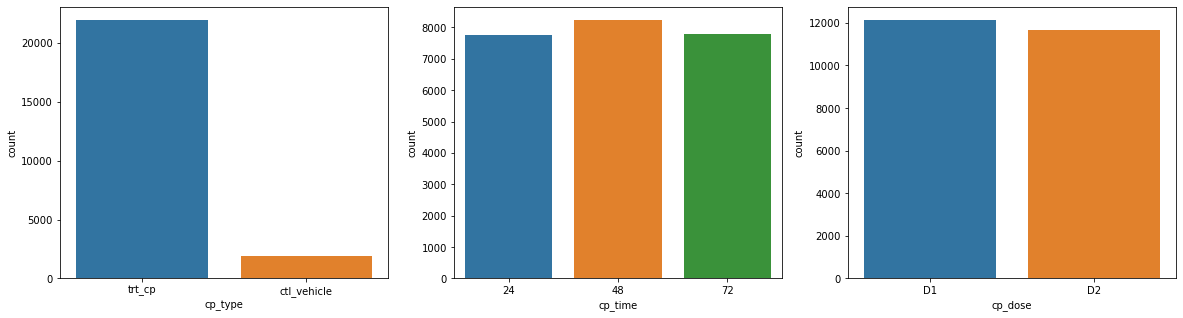

In [8]:
print("Count plot for categorical feature in Train data")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x="cp_type", data=df_train_features, ax=ax1)
sns.countplot(x="cp_time", data=df_train_features, ax=ax2)
sns.countplot(x="cp_dose", data=df_train_features, ax=ax3)

Count plot for categorical feature in test data


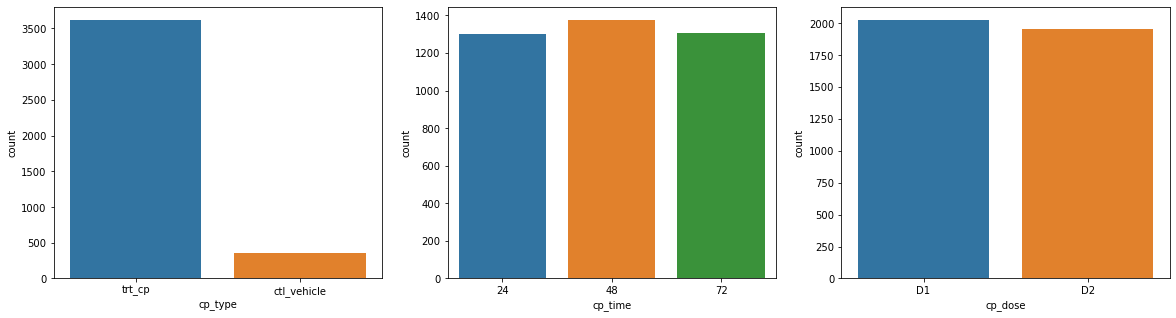

In [9]:
print("Count plot for categorical feature in test data")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
sns.countplot(x="cp_type", data=df_test_features, ax=ax1)
sns.countplot(x="cp_time", data=df_test_features, ax=ax2)
sns.countplot(x="cp_dose", data=df_test_features, ax=ax3)

Mapping categorical data

In [10]:
df_train_features['cp_type'] = df_train_features['cp_type'].map({'trt_cp':0,'ctl_vehicle':1})
df_train_features['cp_time'] = df_train_features['cp_time'].map({24:0,48:1,72:2})
df_train_features['cp_dose'] = df_train_features['cp_dose'].map({'D1':0,'D2':1})

df_test_features['cp_type'] = df_test_features['cp_type'].map({'trt_cp':0,'ctl_vehicle':1})
df_test_features['cp_time'] = df_test_features['cp_time'].map({24:0,48:1,72:2})
df_test_features['cp_dose'] = df_test_features['cp_dose'].map({'D1':0,'D2':1})

In [11]:
df_train_target.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_train_target_temp = df_train_target.drop('sig_id', axis=1) 
df_count = df_train_target_temp.apply(pd.Series.value_counts)
df_count = df_count.sort_values(by = 1, axis = 1, ascending = False) 

In [13]:
df_T = df_count.T
df_T['Index'] = df_T.index

In [14]:
df_T

,0,1,Index
nfkb_inhibitor,22982,832,nfkb_inhibitor
proteasome_inhibitor,23088,726,proteasome_inhibitor
cyclooxygenase_inhibitor,23379,435,cyclooxygenase_inhibitor
dopamine_receptor_antagonist,23390,424,dopamine_receptor_antagonist
serotonin_receptor_antagonist,23410,404,serotonin_receptor_antagonist
...,...,...,...
elastase_inhibitor,23808,6,elastase_inhibitor
steroid,23808,6,steroid
atm_kinase_inhibitor,23808,6,atm_kinase_inhibitor
erbb2_inhibitor,23813,1,erbb2_inhibitor


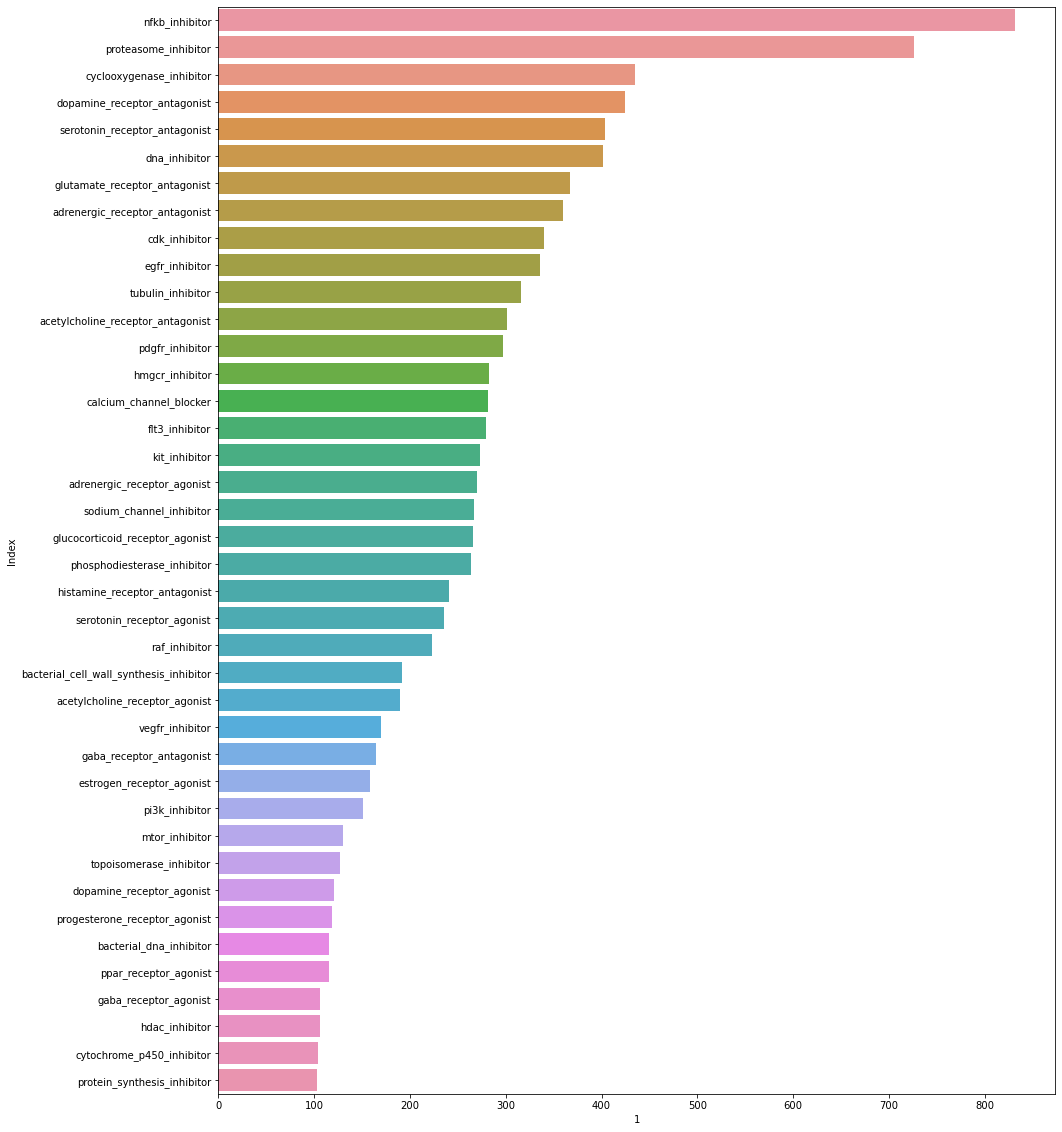

In [15]:
fig, (ax) = plt.subplots(1, 1, figsize=(15,20))
ax = sns.barplot(x=1, y="Index", data=df_T.head(40), ax = ax)

In [16]:
g_col = [col for col in df_train_features if col.startswith('g-')]
c_col = [col for col in df_train_features if col.startswith('c-')]

In [34]:
train_columns = df_train_features.columns.values[1:]
train_columns

array(['cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4',
       'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13',
       'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21',
       'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29',
       'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-37',
       'g-38', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45',
       'g-46', 'g-47', 'g-48', 'g-49', 'g-50', 'g-51', 'g-52', 'g-53',
       'g-54', 'g-55', 'g-56', 'g-57', 'g-58', 'g-59', 'g-60', 'g-61',
       'g-62', 'g-63', 'g-64', 'g-65', 'g-66', 'g-67', 'g-68', 'g-69',
       'g-70', 'g-71', 'g-72', 'g-73', 'g-74', 'g-75', 'g-76', 'g-77',
       'g-78', 'g-79', 'g-80', 'g-81', 'g-82', 'g-83', 'g-84', 'g-85',
       'g-86', 'g-87', 'g-88', 'g-89', 'g-90', 'g-91', 'g-92', 'g-93',
       'g-94', 'g-95', 'g-96', 'g-97', 'g-98', 'g-99', 'g-100', 'g-101',
       'g-102', 'g-103', 'g-104', 'g-105', 'g-106', 'g-107', 'g-108'

In [18]:
target_columns = df_train_target.columns.values[1:]
target_columns

array(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist',
       'acetylcholinesterase_inhibitor', 'adenosine_receptor_agonist',
       'adenosine_receptor_antagonist', 'adenylyl_cyclase_activator',
       'adrenergic_receptor_agonist', 'adrenergic_receptor_antagonist',
       'akt_inhibitor', 'aldehyde_dehydrogenase_inhibitor',
       'alk_inhibitor', 'ampk_activator', 'analgesic',
       'androgen_receptor_agonist', 'androgen_receptor_antagonist',
       'anesthetic_-_local', 'angiogenesis_inhibitor',
       'angiotensin_receptor_antagonist', 'anti-inflammatory',
       'antiarrhythmic', 'antibiotic', 'anticonvulsant', 'antifungal',
       'antihistamine', 'antimalarial', 'antioxidant', 'antiprotozoal',
       'antiviral', 'apoptosis_stimulant', 'aromatase_inhibitor',
       'atm_kinase_inhibitor',
       'atp-sensitive_potassium_channel_antagonist',
       'atp_synthase_inhib

In [19]:
# df = pd.merge(df_train_features, df_train_target, on=['sig_id','sig_id'])

In [20]:
# df["kfold"] = -1  
# df = df.sample(frac=1).reset_index(drop=True)
# X = df
# y = df[target_columns]
# mskf = MultilabelStratifiedKFold(n_splits=5, random_state=12)
# for f, (t_, v_) in enumerate(mskf.split(X, y)):
#      df.loc[v_, 'kfold'] = f


In [21]:
# df.to_csv('train_kfold.csv')
kfold = '/kaggle/input/kfold-train/train_kfold.csv'
df = pd.read_csv(kfold)